# How not to open with PyMCA

In a recently sent pdf entitled [Instructions for opening ID13 integrated data with PyMCA](http://localhost:44221/lab/tree/2024-XXX_Mondriaan-micro-XRD-met-Inez/data/XRD/how%20to%20open%20data%20integrated%20with%20ewoks_final.pdf)  a rather complicated meythod is suggested for opening the hdf5 data files. Below we show that a much simpler approach using `h5py` produces the same data cube.

The data is structured in hdf5 format so we need to install (once) the Python package from Andrew Colette with `%pip install h5py` and restart the kernel. 

In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import h5py

## XRD hdf5 data explorations 

In [2]:
!tree ..

..
├── data
│   ├── microscopy
│   │   ├── 1038646-1
│   │   │   ├── 1038646-1_1.tif
│   │   │   ├── 1038646-1 UV 20x.jpg
│   │   │   └── 1038646-1 VIS 20x.jpg
│   │   ├── xrdfotosomvisuvensem
│   │   │   ├── 1038646-1_1.tif
│   │   │   ├── 1038646-1 UV 20x.jpg
│   │   │   └── 1038646-1 VIS 20x.jpg
│   │   └── xrdfotosomvisuvensem.zip
│   ├── XRD
│   │   ├── how to open data integrated with ewoks_final.pdf
│   │   ├── IvdW_0333329_01
│   │   │   └── IvdW_0333329_01_roi91399_107460
│   │   │       ├── IvdW_0333329_01_roi91399_107460_0001.json
│   │   │       ├── IvdW_0333329_01_roi91399_107460.edf
│   │   │       └── IvdW_0333329_01_roi91399_107460.h5
│   │   ├── IvdW_1038646_1
│   │   │   └── IvdW_1038646_1_roi91400_107461
│   │   │       ├── IvdW_1038646_1_roi91400_107461_0001.json
│   │   │       ├── IvdW_1038646_1_roi91400_107461.edf
│   │   │       └── IvdW_1038646_1_roi91400_107461.h5
│   │   ├── IvdW_90_12_X5
│   │   │   └── IvdW_90_12_X5_roi91398_107459
│   │   │       ├── IvdW_

In [3]:
h5_files = glob('../**/*.h5', recursive=True)
for i, fn in enumerate(h5_files): 
    print(f'[{i}] {fn}')

[0] ../data/XRD/IvdW_0333329_01/IvdW_0333329_01_roi91399_107460/IvdW_0333329_01_roi91399_107460.h5
[1] ../data/XRD/IvdW_1038646_1/IvdW_1038646_1_roi91400_107461/IvdW_1038646_1_roi91400_107461.h5
[2] ../data/XRD/IvdW_90_12_X5/IvdW_90_12_X5_roi91398_107459/IvdW_90_12_X5_roi91398_107459.h5


Ok, let's take a look at the content of the first file. 

In [4]:
fh = h5py.File(h5_files[0], mode='r')

In [5]:
list_of_names = []
fh.visit(list_of_names.append)
list_of_names

['1.1',
 '1.1/eiger_average',
 '1.1/eiger_average/average',
 '1.1/eiger_average/average/2th',
 '1.1/eiger_average/average/average_intensity',
 '1.1/eiger_average/average/reference_hydrocerussite',
 '1.1/eiger_diffmap',
 '1.1/eiger_diffmap/configuration',
 '1.1/eiger_diffmap/configuration/data',
 '1.1/eiger_diffmap/configuration/type',
 '1.1/eiger_diffmap/dim0',
 '1.1/eiger_diffmap/dim1',
 '1.1/eiger_diffmap/dim2',
 '1.1/eiger_diffmap/mask_file',
 '1.1/eiger_diffmap/offset',
 '1.1/eiger_diffmap/program',
 '1.1/eiger_diffmap/result',
 '1.1/eiger_diffmap/result/2th',
 '1.1/eiger_diffmap/result/intensity',
 '1.1/eiger_diffmap/result/map',
 '1.1/eiger_integrate',
 '1.1/eiger_integrate/configuration',
 '1.1/eiger_integrate/configuration/data',
 '1.1/eiger_integrate/configuration/type',
 '1.1/eiger_integrate/integrated',
 '1.1/eiger_integrate/integrated/2th',
 '1.1/eiger_integrate/integrated/intensity',
 '1.1/eiger_integrate/integrated/points',
 '1.1/eiger_integrate/program',
 '1.1/eiger_inte

In a recently sent pdf entitled [Instructions for opening ID13 integrated data with PyMCA](http://localhost:44221/lab/tree/2024-XXX_Mondriaan-micro-XRD-met-Inez/data/XRD/how%20to%20open%20data%20integrated%20with%20ewoks_final.pdf) suggests that the dataset of interest is: `1.1 > eiger_integrate > integrated`.

In [6]:
x = np.array(fh['1.1/eiger_integrate/integrated/2th'])
inty_integrated = np.array(fh['1.1/eiger_integrate/integrated/intensity'])

In [7]:
inty_integrated.shape

(18700, 1400)

Mm, this is a flattened array. In order to create a map we need to reshape this array by looking up the map dimensions. The instructions state that we can easily find this information in online the logbook of the experiment. For us, it is more simple to look up the dimensions from the `1.1/eiger_diffmap/result/intensity`. Let's subsequently compare both maps...  

In [8]:
inty_diffmap = np.array(fh['1.1/eiger_diffmap/result/intensity']) 
map_shape = inty_diffmap.shape
map_shape

(110, 170, 1400)

In [9]:
%matplotlib inline

In [10]:
inty_integrated_map = inty_integrated.reshape(map_shape)

Text(0.5, 1.0, 'difference')

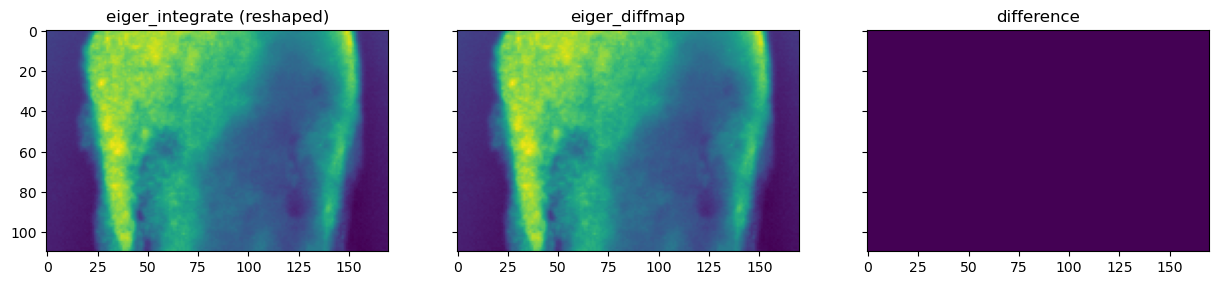

In [11]:
fig, [ax0, ax1, ax2] = plt.subplots(figsize=[15, 5], ncols=3, squeeze=True, sharex=True, sharey=True)
ax0.imshow(np.sum(inty_integrated_map, axis=2))
ax1.imshow(np.sum(inty_diffmap, axis=2))
ax2.imshow(np.sum(inty_integrated_map, axis=2) - np.sum(inty_diffmap, axis=2))

ax0.set_title('eiger_integrate (reshaped)')
ax1.set_title('eiger_diffmap')
ax2.set_title('difference')